In [1]:
!apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
15 packages can be upgraded. Run 

# Install the required moduels





In [2]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (87.0.4280.66-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [3]:
!which chromedriver

/usr/bin/chromedriver


In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 133kB 9.1MB/s 


We use Selenium with chrome driver in navigating the web pages to scrape the required presidential speeches from the millercenter.org website.

In [5]:
#!pip install selenium

In [6]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

For our project we select state-of-union speech given by the presidents of the United States from the year 1981-2020

In [8]:
ronald=['https://millercenter.org/the-presidency/presidential-speeches/january-25-1988-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-25-1988-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-27-1987-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/february-4-1986-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/february-6-1985-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-25-1984-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-26-1982-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-20-1981-first-inaugural-address']



george_h_bush=['https://millercenter.org/the-presidency/presidential-speeches/january-28-1992-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-29-1991-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-31-1990-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-20-1989-inaugural-address']


bill_clinton=['https://millercenter.org/the-presidency/presidential-speeches/january-27-2000-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-19-1999-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-27-1998-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/february-4-1997-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-23-1996-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-24-1995-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-25-1994-state-union-address',

'https://millercenter.org/the-presidency/presidential-speeches/january-20-1993-first-inaugural']

donald_trump = ['https://millercenter.org/the-presidency/presidential-speeches/february-4-2020-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/february-5-2019-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-30-2018-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-20-2017-inaugural-address']

barack_obama = ['https://millercenter.org/the-presidency/presidential-speeches/january-12-2016-2016-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-20-2015-2015-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-28-2014-2014-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/february-13-2013-2013-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-24-2012-2012-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-25-2011-2011-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-27-2010-2010-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-20-2009-inaugural-address']
george_bush = ['https://millercenter.org/the-presidency/presidential-speeches/january-28-2008-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-23-2007-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-31-2006-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/february-2-2005-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-20-2004-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-28-2003-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-29-2002-state-union-address',
     'https://millercenter.org/the-presidency/presidential-speeches/january-20-2001-first-inaugural-address']


In [9]:
# Defining a function to scrape the data from the website
def Datacollector(potus):
  out_list=[]
  for url in potus:
  
    wd.get(url)
    divs = wd.find_element_by_xpath('//*[@id="block-mainpagecontent"]/article/div/div[2]/div[3]/div/div[1]/div')
    divs.click()
    transcript= wd.find_element_by_xpath('//*[@id="dp-expandable-text"]/div[1]')
    text= transcript.get_attribute('textContent')
    out_list.append(text)
  return out_list

In [10]:
import time
start = time.time()
ronald_text= Datacollector(ronald)
georgehbush_text= Datacollector(george_h_bush)
bill_text= Datacollector(bill_clinton)
donald_text = Datacollector(donald_trump)
obama_text = Datacollector(barack_obama)
georgewbush_text = Datacollector(george_bush)
end = time.time()
print(end-start)

42.5358145236969


For the course of our project we will be analyzing and comparing the results between, the speech given by different presidents. 

In [11]:
# Select the Presidents to analyze the speech given by them
president_1 = 'Donald Trump' #@param ['Ronald Regan', 'Geroge.H Bush', 'Bill Clinton', 'George.W Bush','Barack Obama', 'Donald Trump']
president_2 = 'Barack Obama' #@param ['Ronald Regan', 'Geroge.H Bush', 'Bill Clinton', 'George.W Bush','Barack Obama', 'Donald Trump']

In [12]:
def president(x):
  if x == 'Ronald Regan':
    president_data = ronald_text
  elif x == 'Geroge.H Bush':
    president_data = georgehbush_text
  elif x == 'Bill Clinton':
    president_data = bill_text
  elif x == 'George.W Bush':
    president_data = georgewbush_text
  elif x == 'Barack Obama':
    president_data = obama_text
  else:
    president_data = donald_text
  return president_data

president_data_1 = president(president_1)
president_data_2 = president(president_2)

In [13]:
president_total_text_1 = ''
president_total_text_2 = ''
for i in president_data_1:
    president_total_text_1 += i
for i in president_data_2:
    president_total_text_2 += i

## Data Cleaning

We used the NLTK (Natural Language Tool Kit) module to pre-process/clean our data.

In [14]:
#!pip install nltk

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Download the puctuations
nltk.download('punkt')
# Download the stop-words
nltk.download('stopwords')

# Remove punctuations
president_total_text_1= re.sub(re.compile('<.*?>'),'',president_total_text_1)
# Remove non-alpha numeric characters
president_total_text_1= re.sub('[^A-Za-z0-9]+',' ',president_total_text_1)
# Change the text to lower-case
president_total_text_1a= president_total_text_1.lower()
# Tokenize the speech
tokens_president_1= word_tokenize(president_total_text_1a)
stop_words= stopwords.words('english')
# Add all the required words to the stop-words corpus
stop_words.extend(['from', 'mr', 'said','subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done',
'try', 'many', 'applause', 'u','000', 'one', 'year', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
# Remove stop-words
filtered_speech_president_1 = [word for word in tokens_president_1 if word not in stop_words]

#filtered_speech


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Remove punctuations
president_total_text_2= re.sub(re.compile('<.*?>'),'',president_total_text_2)
# Remove non-alpha numeric characters
president_total_text_2= re.sub('[^A-Za-z0-9]+',' ',president_total_text_2)
# Change the text to lower-case
president_total_text_2a= president_total_text_2.lower()
# Tokenize the speech
tokens_president_2= word_tokenize(president_total_text_2a)
stop_words= stopwords.words('english')
# Add all the required words to the stop-words corpus
stop_words.extend(['from', 'mr', 'said','subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done',
'try', 'many', 'applause', 'u','000', 'one', 'year', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
# Remove stop-words
filtered_speech_president_2 = [word for word in tokens_president_2 if word not in stop_words]


In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Lemmatize the filtered-sentences
from nltk.stem import WordNetLemmatizer

lemmatizer= WordNetLemmatizer()

lemm_speech_president_1 = [lemmatizer.lemmatize(word) for word in filtered_speech_president_1]
lemm_speech_president_2 = [lemmatizer.lemmatize(word) for word in filtered_speech_president_2]
#lemm_speech

## Frequency Distribution and Keywords

Frequency distribustion finds the most recurring words in a document.

In [19]:
from nltk.probability import FreqDist
for i in range(lemm_speech_president_1.count('u')):
  lemm_speech_president_1.remove('u')
freqdist_president_1 = FreqDist(lemm_speech_president_1)

Frequency Distribution of : Donald Trump


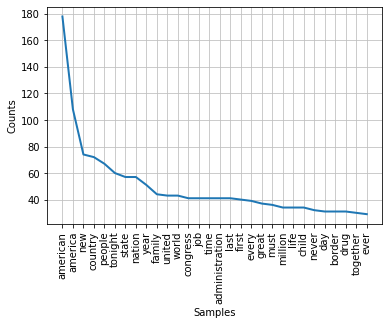

In [20]:
print("Frequency Distribution of :", president_1)
# Here we are plotting the top 30 most recurring words in the document for the president
freqdist_president_1.plot(30,cumulative=False)

Frequency Distribution of : Barack Obama


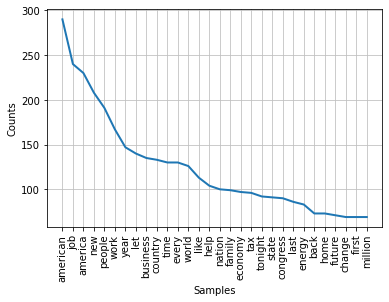

In [21]:
for i in range(lemm_speech_president_2.count('u')):
  lemm_speech_president_2.remove('u')
freqdist_president_2 = FreqDist(lemm_speech_president_2)
print("Frequency Distribution of :", president_2)
freqdist_president_2.plot(30,cumulative=False)

In [22]:
freqdist_president_1
freqdist_president_1_keys = {k: v for k, v in sorted(freqdist_president_1.items(), key=lambda item: item[1])}

In [23]:
vocab_president_1 = list(freqdist_president_1_keys.keys())
w = tuple(set(vocab_president_1[len(vocab_president_1)-50:]))
words_president_1 = dict([(key, freqdist_president_1_keys[key]) for key in w])

In [24]:
freqdist_president_2_keys = {k: v for k, v in sorted(freqdist_president_2.items(), key=lambda item: item[1])}
vocab_president_2 = list(freqdist_president_2_keys.keys())
w = tuple(set(vocab_president_2[len(vocab_president_2)-50:]))
words_president_2 = dict([(key, freqdist_president_2_keys[key]) for key in w])

Dispersion plot is used to find the importance of the word by its dispersion in the corpus. It is a measure of its homogenity across the parts of a corpus.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single

Dispersion plot for the president : Donald Trump


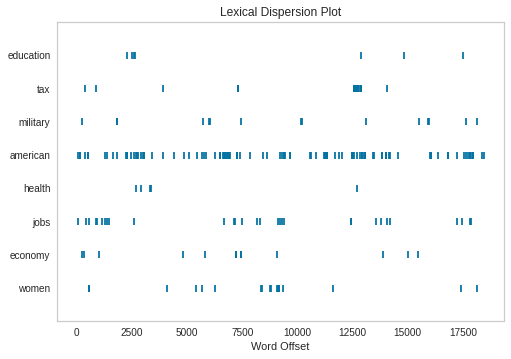

In [25]:
from yellowbrick.text import DispersionPlot
from sklearn import metrics
# target_words  are the required words for which we find the importance of them in the corpus
target_words=['education','tax','military','american','health','jobs','economy','women']
visualizer= DispersionPlot(target_words)
visualizer.fit([president_total_text_1a.split()])
print("Dispersion plot for the president :",president_1)
_=visualizer.poof()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Dispersion plot for the president : Barack Obama


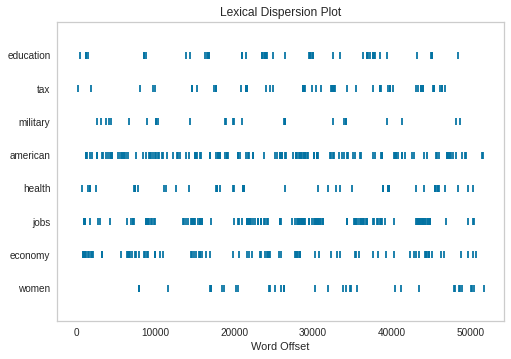

In [26]:
visualizer= DispersionPlot(target_words)
visualizer.fit([president_total_text_2a.split()])
print("Dispersion plot for the president :",president_2)
_=visualizer.poof()

We can observe the difference in graphs between the two presidents where president Barack Obama emphasized more on the given topics in his speech than Donald Trump.

Word cloud is an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.

Word-cloud for the president : Donald Trump


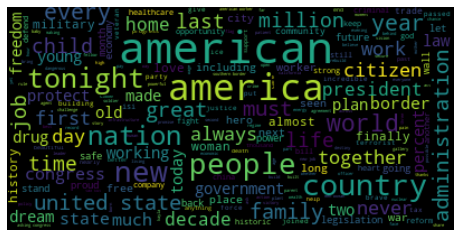

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# wordcloud = WordCloud().generate(cleaned)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(lemm_speech_president_1))
print("Word-cloud for the president :",president_1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Word-cloud for the president : Barack Obama


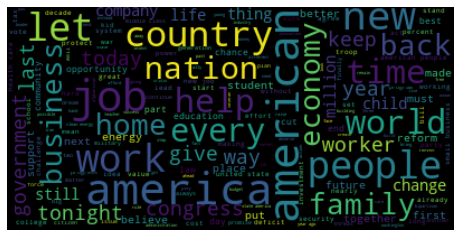

In [28]:
wordcloud = WordCloud(max_font_size=40).generate(' '.join(lemm_speech_president_2))
print("Word-cloud for the president :",president_2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
#!pip install pytextrank

PyTextRank extracts the top-ranked phrases from text documents,
runs low-cost extractive summarization of text documents and
helps us to infer links from unstructured text into structured data

In [30]:
import spacy
import pytextrank
nlp = spacy.load("en_core_web_sm")
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)
doc = nlp(president_total_text_1)
print("Key-phrases based on rank for the president :",president_1)
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    #print(p.chunks)

Key-phrases based on rank for the president : Donald Trump
0.0534     1  american heart american hands
0.0534     1  new american heroes
0.0528     1  african american hispanic american
0.0504     6  american families
0.0492     3  american jobs
0.0491     1  america applause
0.0475     2  american lives
0.0474     1  american healthcare applause
0.0460     7  american workers
0.0458    91  american
0.0457     1  american auto jobs
0.0457   152  america
0.0453     1  almighty god applause america
0.0451     2  american freedom
0.0448     1  american companies
0.0445     4  many many years
0.0443     8  new jobs
0.0443     1  american history
0.0441     3  american patients
0.0440     4  american soldiers
0.0438     4  african american
0.0438     1  american justice
0.0437     1  american hands
0.0436     1  american industry
0.0436     2  american taxpayers
0.0435     1  applause african american poverty
0.0435     1  american politics
0.0432    32  last year
0.0432     1  american int

In [31]:
doc = nlp(president_total_text_2)
print("Key-phrases based on rank for the president :",president_2)
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    #print(p.chunks)

Key-phrases based on rank for the president : Barack Obama
0.0546     1  new american jobs
0.0516    22  new jobs
0.0500    11  more jobs
0.0483     3  new businesses
0.0482     1  less pollution more manufacturing more jobs
0.0481     1  most new jobs
0.0480     1  countless new jobs
0.0477     1  more american families
0.0477     5  more people
0.0473     1  good american jobs
0.0473     1  good paying american jobs
0.0467     2  more young people
0.0460     2  american jobs
0.0454     1  new american industries
0.0447     8  more americans
0.0443     1  more small business owners
0.0441     2  high paying jobs
0.0439     1  new applause
0.0436     1  small businesses new trade partnerships
0.0436     1  more efficiency more incentives
0.0432     2  more time
0.0432     2  good paying jobs
0.0430     1  more american cars
0.0428     1  more families
0.0428     8  applause america
0.0427     1  more american products
0.0426     1  give america
0.0423    10  good jobs
0.0423     1  new

Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community. We use this module to extract keywords from our document.

In [32]:
from gensim.summarization import keywords, mz_keywords
print("Keywords for the president :",president_1)
print(keywords(president_total_text_1))

Keywords for the president : Donald Trump
american
americans
states applause
million new
good news
america
great
greatness
tonight
year
families
family
nations
nation
national
like
likes
thank
thanks
drug
people
years ago
trading
old
including
includes
include
generic drugs
jobs
working
work
worked
works
city
cities
days
day
state
stated
general
generation
generals
generations
generates
generously
force
forces
forced
free
office
officer
taxes
historic
historically
government
governments
govern
finally
final
law
lawful
laws
millions
young
workers
trade agreements
country
countries
immigration
immigrants
immigrated
immigrant
nuclear
school
schools
job killing
freedom
freedoms
economic
sergeant
president members
agent
agents
ice officers
powers
powerful
alien
today
braved
bravely
children
life
illegal aliens forcing taxpayers
save
saved
saving
savings
reforms
reformed
reforming
protect
protecting
protection
protects
protected
home
homes
chief
chiefs
time
times
safe
safely
end
ended
ending

In [33]:
print("Keywords for the president :",president_2)
print(keywords(president_total_text_2))

Keywords for the president : Barack Obama
applause
americans
american
news
likely
liked
america
americas
job
jobs
work
worked
help
helps
helped
helping people
peoples
business
businesses
busy
let
letting
lets
working families
year
years
bipartisan priorities like
nation
national
nations
nationality
rightful
new immigrants workers fighting
today
taxes
works hard
tonight
reform
reformed
reforms
reforming
economy
economies
tax cuts
students
student
family
difference
differences
differently
differing
cutting
cuttings
better
country
countries
government
governments
governing
governance
govern
goodness
goods
companies
company
home
homes
right thing
security
secured
secure
secures
securing
schools
world
economic
economics
worker
million
millions
communities
community
communism
making
makes
education
educational
educate
educating
congress
energy sector
time
times
good paying
powerful
powered
powers
final
finally
finalized
state
states
stating
opportunity
opportunities
highs
financial
wars
war


Montemurro and Zanette algorithm


The algorithm identifies words that are significant to the structure of the document - these often correspond to the major themes. It does so independently of a corpus.


We used the mz_keywords module from the gensim library that extracts weighted keywords based on the MZ algorithm.

In [34]:
print("Weighted-Keywords for the president :",president_1)
mz_keywords(' '.join(lemm_speech_president_1), scores=True,weighted=False,threshold=1.0)

Weighted-Keywords for the president : Donald Trump


/usr/local/lib/python3.6/dist-packages/gensim/summarization/mz_entropy.py:70: RuntimeWarning: divide by zero encountered in log2
  log_p = numpy.log2(p)
/usr/local/lib/python3.6/dist-packages/gensim/summarization/mz_entropy.py:71: RuntimeWarning: invalid value encountered in multiply
  h = numpy.nan_to_num(p * log_p).sum(axis=0)


[('sanctuary', 2.751383081921592),
 ('alice', 2.4516794741002905),
 ('ellie', 2.4516794741002905),
 ('pillar', 2.4516794741002905),
 ('amy', 2.303198444734015),
 ('iain', 2.303198444734015),
 ('janiyah', 2.303198444734015),
 ('otto', 2.303198444734015),
 ('tony', 2.303198444734015),
 ('cj', 2.114012760775462),
 ('deserve', 2.114012760775462),
 ('ho', 2.114012760775462),
 ('joshua', 2.114012760775462),
 ('judah', 2.114012760775462),
 ('justin', 2.114012760775462),
 ('kenton', 2.114012760775462),
 ('protected', 2.114012760775462),
 ('ryan', 2.114012760775462),
 ('seong', 2.114012760775462),
 ('ashlee', 1.8641945320975448),
 ('barrier', 1.8641945320975448),
 ('corey', 1.8641945320975448),
 ('elvin', 1.8641945320975448),
 ('find', 1.8641945320975448),
 ('hake', 1.8641945320975448),
 ('iranian', 1.8641945320975448),
 ('jody', 1.8641945320975448),
 ('matthew', 1.8641945320975448),
 ('monument', 1.8641945320975448),
 ('nisa', 1.8641945320975448),
 ('ortiz', 1.8641945320975448),
 ('preston', 1

In [35]:
print("Weighted-Keywords for the president :",president_2)
mz_keywords(' '.join(lemm_speech_president_2), scores=True,weighted=False,threshold=1.0)

Weighted-Keywords for the president : Barack Obama


/usr/local/lib/python3.6/dist-packages/gensim/summarization/mz_entropy.py:70: RuntimeWarning: divide by zero encountered in log2
  log_p = numpy.log2(p)
/usr/local/lib/python3.6/dist-packages/gensim/summarization/mz_entropy.py:71: RuntimeWarning: invalid value encountered in multiply
  h = numpy.nan_to_num(p * log_p).sum(axis=0)


[('isil', 2.4982275749627245),
 ('childcare', 2.278155681381858),
 ('brandon', 2.239979784765292),
 ('economics', 2.239979784765292),
 ('reduction', 2.0701387800850997),
 ('rebekah', 2.0104420001223215),
 ('fraud', 1.9477741574258083),
 ('hated', 1.9477741574258083),
 ('jackie', 1.9477741574258083),
 ('preschool', 1.9477741574258083),
 ('voice', 1.8520916019958402),
 ('spending', 1.8184703110393294),
 ('cory', 1.6765834226331755),
 ('gas', 1.6400005939151008),
 ('clean', 1.6057013473636115),
 ('diplomacy', 1.5623553141009348),
 ('brian', 1.5594792653773986),
 ('bryan', 1.5594792653773986),
 ('contain', 1.5594792653773986),
 ('desiline', 1.5594792653773986),
 ('drilling', 1.5594792653773986),
 ('january', 1.5594792653773986),
 ('lock', 1.5594792653773986),
 ('master', 1.5594792653773986),
 ('milk', 1.5594792653773986),
 ('propose', 1.5594792653773986),
 ('robert', 1.5594792653773986),
 ('setback', 1.5594792653773986),
 ('spill', 1.5594792653773986),
 ('afghan', 1.5542281273141816),
 ('i

## Topic Modeling

NMF has been widely used as a clustering method especially for document data, and as a topic
modeling method. NMF can also be used for dimensionality reduction, source separation, or topic extraction using sklearn’s ‘decomposition’ class.


In [36]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
vectorizer = TfidfVectorizer(max_features=50, min_df=1, stop_words='english')
X = vectorizer.fit_transform(lemm_speech_president_1)
idx_to_word = np.array(vectorizer.get_feature_names())
# apply NMF
nmf = NMF(n_components=20, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_
print("Topics for the president :",president_1)
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-10:]]])))


Topics for the president : Donald Trump
Topic 1: congress,time,home,job,work,president,family,day,drug,american
Topic 2: stand,job,administration,united,time,year,state,tonight,country,america
Topic 3: decade,government,law,year,ago,woman,tonight,tax,drug,new
Topic 4: tax,god,woman,border,new,citizen,home,work,day,country
Topic 5: year,like,ago,decade,new,president,woman,drug,border,people
Topic 6: people,like,tax,nation,worker,decade,drug,president,border,tonight
Topic 7: country,law,tax,woman,citizen,home,border,day,nation,state
Topic 8: people,like,government,year,new,decade,tax,ago,drug,nation
Topic 9: city,illegal,worker,law,decade,president,citizen,work,border,year
Topic 10: percent,trade,month,president,ago,like,worker,god,drug,family
Topic 11: freedom,criminal,month,ago,tax,worker,god,woman,drug,united
Topic 12: freedom,legislation,working,illegal,united,government,tax,ago,drug,world
Topic 13: legislation,city,government,congress,law,worker,woman,tax,decade,administration
Topic

```
from sklearn.pipeline import Pipeline
vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
nmf = NMF(solver='mu')
pipe = Pipeline([('tfidf',TfidfVectorizer(min_df=1,stop_words='english')),('nmf',NMF(solver='mu'))])
param_grid = {'tfidf__max_features':[50,100,150,200],'nmf__n_components':[10,15,20,25,30]}
gs = GridSearchCV(pipe,param_grid)
gs.fit(lemm_speech)

```

As NMF is a deterministic model, we don’t have a way to modify the probabilities to see how the key terms vary within each topic. For better Topic coherence, we can try a probabilistic model like LDA.


Since we have a lot of parameters to initialize before evalutaing our data with the LDA model, we used a grid-search with pipelines to find the best parameters for our model.

```
pipe = Pipeline([('cv',CountVectorizer(analyzer='word',stop_words='english',lowercase=True,token_pattern='[a-zA-Z0-9]{3,}')),
                 ('lda',LatentDirichletAllocation())])
search_params = {'lda__n_components': [10, 15, 20, 25, 30], 'lda__learning_decay': [.5, .7, .9], 
                 'lda__learning_method':['online'],'lda__n_jobs':[-1], 'cv__max_features':[50,100,150,200],
                'cv__min_df':[1,2,3,4]}
model = GridSearchCV(pipe, param_grid=search_params)
model.fit(lemm_speech)
model.best_params_
```

These are the optimum parameters to evaluate our LDA model.

```
{'cv__max_features': 50,
 'cv__min_df': 1,
 'lda__learning_decay': 0.7,
 'lda__learning_method': 'online',
 'lda__n_components': 10,
 'lda__n_jobs': -1}
 ```

```
Best Log Likelihood Score:  -4528.304797837314
Model Perplexity:  50.799092
```

We got the perplexity socre of 50.799092, which means the topics are predictable to our model. 

Let's try increasing the number of components/topics to predict and evaluate the perplexity score.



Perplexity scores for the Topics of the president : Donald Trump


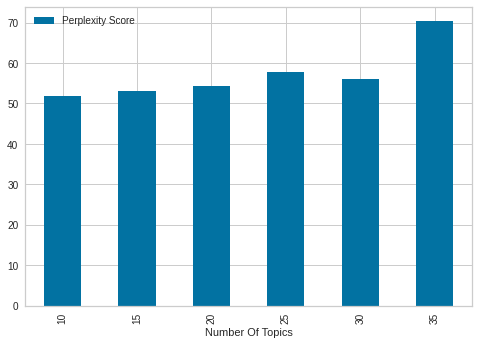

In [37]:
from sklearn.decomposition import LatentDirichletAllocation
import pandas
def perplexity_by_ntopic(data, ntopics):
    output_dict = {
        "Number Of Topics": [], 
        "Perplexity Score": []
    }
    for t in ntopics:
        lda = LatentDirichletAllocation(
            n_components=t,
            learning_method="online",
            random_state=0
        )
        lda.fit(data)
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
    output_df = pandas.DataFrame(output_dict)
    index_min_perplexity = output_df["Perplexity Score"].idxmin()
    output_num_topics = output_df.loc[
        index_min_perplexity,  # index
        "Number Of Topics"  # column
    ]
    return (output_df, output_num_topics)
df_perplexity, optimal_num_topics = perplexity_by_ntopic(X, ntopics=[i for i in range(10, 40) if i % 5 == 0])
print("Perplexity scores for the Topics of the president :",president_1)
df_perplexity.set_index('Number Of Topics').plot(kind='bar')

We can observe a little difference when we try to increase the number of topics to be predicted by our model. Yet, the perplexity score of 55.814385 for 35 topics indicates there is little/none randomness in predicting the topics by our model.

In [38]:
df_perplexity

,Number Of Topics,Perplexity Score
0,10,51.815374
1,15,53.016777
2,20,54.346422
3,25,57.851635
4,30,56.071780
5,35,70.460588


In [39]:
import math
def Entropy(text1,base = 2.0):
    #make set with all unrepeatable symbols from string
    dct = dict.fromkeys(list(text1))
    #calculate frequencies
    pkvec =  [float(text1.count(c)) / len(text1) for c in dct]
    #calculate Entropy
    H = -sum([pk  * math.log(pk) / math.log(base) for pk in pkvec ])
    return H
print("Entropy Index for the president :",president_1)
print('Entropy Index: ', Entropy(' '.join(lemm_speech_president_1)))

Entropy Index for the president : Donald Trump
Entropy Index:  4.238964758154637


Entropy lies in the range of (0,1). If the value of entropy is > 1, it means the same, a very high level of disorder. We got an entropy index value of ~ 4 which means there is a high level of disorder in our data

In [40]:
#!pip install pyLDAvis

```
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import pyLDAvis.sklearn
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=200          
                            )
data_vectorized = vectorizer.fit_transform(lemm_speech)
lda = LatentDirichletAllocation()
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9], 'learning_method':['online'],'n_jobs':[-1]}
model = GridSearchCV(lda, param_grid=search_params)
model.fit(data_vectorized)
```

Topic modeling using LDA

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.sklearn
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=1,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=50          
                            )
data_vectorized = vectorizer.fit_transform(lemm_speech_president_1)
lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_method='online',
                                      random_state=0,
                                      learning_decay=0.7,
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
# pyLDAvis.enable_notebook()
# pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

In [42]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print("Topics for the president :",president_1)
print_topics(lda_model,vectorizer,20)

Topics for the president : Donald Trump

Topic #0:
america state year citizen god drug criminal administration freedom home illegal worker tonight country tax dream nation child working ago

Topic #1:
american great criminal time percent illegal ago city work world old day family drug america life nation dream trade like

Topic #2:
child day work decade government legislation percent woman criminal tonight drug protect america state home world trade family worker united

Topic #3:
people nation border ago country american america freedom day work tonight dream citizen time great like woman child president government

Topic #4:
united time job month stand tax tonight year protect drug state like people million working country great freedom city world

Topic #5:
new life president woman like america dream legislation government nation time month citizen young home job illegal tax city family

Topic #6:
congress administration dream old criminal year protect nation world work law people g

In [43]:
import pandas as pd
lda_output = lda_model.transform(data_vectorized)
topicnames = ['Topic' + str(i) for i in range(lda_model.n_components)]
docnames = ['Doc' + str(i) for i in range(len(lemm_speech_president_1))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)
df_document_topics = df_document_topic.head(10).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc3,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc6,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,5
Doc7,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc8,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,6
Doc9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0


The above dataframe indicates that the entire speech is divided into 10 documents and 10 topics are extracted from each of these docuemnts. We then use LDA to find the dominant topic from each of these documents

In [44]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  12.335907
7       0.648955  71.707100       2        1  11.646442
1      71.019684   9.971006       3        1  10.929399
5       3.785981  33.185135       4        1   9.908991
3     -42.666500  -9.222070       5        1   9.881412
2      -3.621689 -43.526516       6        1   9.798676
9      -3.632402  -4.171708       7        1   9.578047
4     -36.584400  35.804413       8        1   9.467733
6      44.391380  50.615383       9        1   8.254275
8      40.235809 -31.591665      10        1   8.199117, topic_info=        Term        Freq       Total Category  logprob  loglift
3   american  160.000000  160.000000  Default  30.0000  30.0000
2    america   93.000000   93.000000  Default  29.0000  29.0000
30       new   74.000000   74.000000  Default  28.0000  28.0000
32    people   69.000000   69.000000  Default  27.0000  27.0000
9    country   64.000000   64.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
22       job    0.127031   42.277425  Topic10  -7.0649  -3.3064
2    america    0.127031   93.206528  Topic10  -7.0649  -4.0970
29    nation    0.127031   58.116170  Topic10  -7.0649  -3.6246
39      time    0.127031   42.974506  Topic10  -7.0649  -3.3228
3   american    0.127031  160.154853  Topic10  -7.0649  -4.6383

[437 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         9  0.980973  administration
1         5  0.945544             ago
2         1  0.987055         america
3         3  0.992789        american
4         5  0.966338          border
5         6  0.966040           child
6         1  0.965214         citizen
7         7  0.959180            city
8         9  0.990422        congress
9         2  0.990774         country
10        2  0.924351        criminal
11        6  0.959023             day
12        6  0.954306          decade
13        9  0.955460           dream
14        2  0.959467            drug
15        7  0.975319          family
16        7  0.940983         freedom
17        1  0.940179             god
18        6  0.971713      government
19        3  0.983482           great
20        7  0.974907            home
21       10  0.970447         illegal
22        8  0.969785             job
23        7  0.970322             law
24        6  0.952777     legislation
25        4  0.987291            life
26        4  0.967508            like
27       10  0.982192         million
28        8  0.946243           month
29        5  0.980794          nation
30        4  0.981666             new
31        9  0.958657             old
32        5  0.984609          people
33        6  0.962666         percent
34        4  0.981830       president
35        2  0.951945         protect
36        8  0.939118           stand
37        1  0.986674           state
38       10  0.978204             tax
39        8  0.977324            time
40        2  0.974661         tonight
41       10  0.958763           trade
42        8  0.980906          united
43        4  0.967017           woman
44        6  0.970366            work
45       10  0.954820          worker
46        7  0.941630         working
47        2  0.972937           world
48        1  0.982664            year
49        7  0.947700           young, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 2, 6, 4, 3, 10, 5, 7, 9])

In the above visualization we can see the topics and the keywords that were extracted out of the speech using the LDA model. 

Relevance metric indicates the following points:

Values of lambda that are very close to zero will show terms that are more specific for a chosen topic. Meaning that you will see terms that are "important" for that specific topic but not necessarily "important" for the whole corpus.

Values of lambda that are very close to one will show those terms that have the highest ratio between frequency of the terms for that specific topic and the overall frequency of the terms from the corpus.

In [45]:
X = vectorizer.fit_transform(lemm_speech_president_2)
idx_to_word = np.array(vectorizer.get_feature_names())
# apply NMF
nmf = NMF(n_components=20, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_
print("Topics for the president :",president_2)
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-10:]]])))

Topics for the president : Barack Obama
Topic 1: government,million,work,people,home,new,energy,congress,job,american
Topic 2: time,work,government,today,million,people,new,congress,america,job
Topic 3: worker,college,let,year,change,work,american,home,energy,america
Topic 4: let,company,work,year,cut,way,america,future,energy,new
Topic 5: child,school,america,energy,way,cut,home,new,future,people
Topic 6: thing,security,people,today,child,cut,future,government,congress,work
Topic 7: way,work,worker,better,future,cut,today,government,congress,year
Topic 8: community,thing,cut,better,worker,today,home,government,congress,let
Topic 9: thing,country,reform,high,worker,college,change,government,home,business
Topic 10: way,school,today,company,better,worker,million,change,energy,country
Topic 11: hard,security,high,child,way,cut,future,home,energy,time
Topic 12: care,school,way,today,worker,change,home,future,energy,world
Topic 13: change,reform,worker,company,college,way,today,million,ener

Perplexity scores for the Topics of the president : Barack Obama


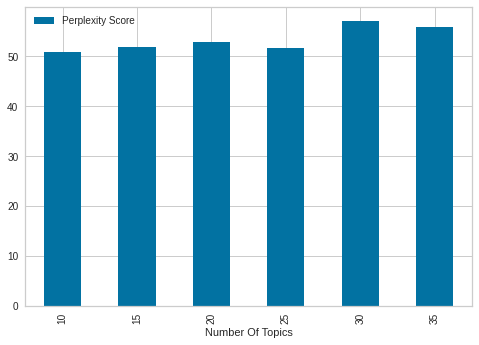

In [46]:
df_perplexity, optimal_num_topics = perplexity_by_ntopic(X, ntopics=[i for i in range(10, 40) if i % 5 == 0])
print("Perplexity scores for the Topics of the president :",president_2)
df_perplexity.set_index('Number Of Topics').plot(kind='bar')

In [47]:
print('Entropy Index: ', Entropy(' '.join(lemm_speech_president_2)))

Entropy Index:  4.225972975829374


In [48]:
data_vectorized = vectorizer.fit_transform(lemm_speech_president_2)
lda_output = lda_model.fit_transform(data_vectorized)
print("Topics for the president :",president_2)
print_topics(lda_model,vectorizer,20)

Topics for the president : Barack Obama

Topic #0:
work home deficit woman student tax care security american country nation economy energy education time million new tonight child way

Topic #1:
american country tax economy care security nation energy education time million new tonight way child hard job worker today support

Topic #2:
world government change better tax care security american country nation time economy energy education million new tonight way child job

Topic #3:
business family company thing home tax care security american country nation economy energy education time million new tonight way child

Topic #4:
let year state life tax care security american country nation economy energy time education new million tonight way child hard

Topic #5:
job tonight energy million today hard tax care security american country nation economy time education new way child worker support

Topic #6:
people school reform day high community tax care security american college country n

In [49]:
lda_output = lda_model.transform(data_vectorized)
topicnames = ['Topic' + str(i) for i in range(lda_model.n_components)]
docnames = ['Doc' + str(i) for i in range(len(lemm_speech_president_2))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [50]:
df_document_topics = df_document_topic.head(10).style.applymap(color_green).applymap(make_bold)
print("Dominant Topics for the president :", president_2)
df_document_topics

Dominant Topics for the president : Barack Obama


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc3,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc5,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,8
Doc6,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc7,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,1
Doc8,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,5
Doc9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0


In [51]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  12.659262
7       0.648955  71.707100       2        1  11.454317
5      71.019684   9.971006       3        1  11.318106
8       3.785981  33.185135       4        1  10.689438
6     -42.666500  -9.222070       5        1   9.976949
4      -3.621689 -43.526516       6        1   9.536882
0      -3.632402  -4.171708       7        1   9.138726
3     -36.584400  35.804413       8        1   8.677703
2      44.391380  50.615383       9        1   8.394803
9      40.235809 -31.591665      10        1   8.153814, topic_info=        Term        Freq       Total Category  logprob  loglift
0    america  290.000000  290.000000  Default  30.0000  30.0000
1   american  237.000000  237.000000  Default  29.0000  29.0000
25       job  211.000000  211.000000  Default  28.0000  28.0000
32    people  192.000000  192.000000  Default  27.0000  27.0000
46      work  176.000000  176.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
25       job    0.130107  211.630379  Topic10  -8.0032  -4.8876
10  congress    0.130107   82.791719  Topic10  -8.0032  -3.9490
22      help    0.130107   95.666863  Topic10  -8.0032  -4.0936
28      like    0.130107  101.825756  Topic10  -8.0032  -4.1560
32    people    0.130107  192.385466  Topic10  -8.0032  -4.7922

[431 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0        10  0.996620     america
1         1  0.995849    american
2         9  0.980900      better
3         8  0.992020    business
4         1  0.983857        care
5         9  0.990891      change
6         4  0.989873       child
7         4  0.978244     college
8         5  0.983103   community
9         8  0.993463     company
10        4  0.990437    congress
11        1  0.986637     country
12        4  0.982702         cut
13        5  0.978169         day
14        7  0.983066     deficit
15        1  0.987196     economy
16        2  0.987038   education
17        3  0.991831      energy
18        8  0.990235      family
19       10  0.992623      future
20        9  0.991049  government
21        3  0.974041        hard
22        4  0.993029        help
23        5  0.979458        high
24        7  0.983927        home
25        3  0.997021         job
26        6  0.995463         let
27        6  0.979896        life
28        4  0.991890        like
29        3  0.984915     million
30        2  0.990517      nation
31        2  0.994877         new
32        5  0.992798      people
33        5  0.976929      reform
34        5  0.992644      school
35        1  0.975314    security
36        6  0.987562       state
37        7  0.990649     student
38        4  0.972224     support
39        1  0.990968         tax
40        8  0.990798       thing
41        2  0.990633        time
42        3  0.982618       today
43        3  0.984049     tonight
44        2  0.974978         way
45        7  0.987881       woman
46        7  0.992859        work
47        2  0.990132      worker
48        9  0.996395       world
49        6  0.993378        year, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 6, 9, 7, 5, 1, 4, 3, 10])

# Clustering

We have done the clustering using the HDBScan. HDBScan does the clustering independent of the topics, which is more of an un-supervised learning where as the clustering algorithms such as PCA, NMF and LDA clusters the data based on the relevant topics.

In [52]:
#!pip install sentence_transformers

In [53]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(lemm_speech_president_1, show_progress_bar=True)

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data

The data is uniformly distributed on Riemannian manifold;
The Riemannian metric is locally constant (or can be approximated as such);
The manifold is locally connected.

In [54]:
import umap.umap_ as umap
umap_embeddings = umap.UMAP(n_neighbors=10, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

In [55]:
#!pip install hdbscan

HDBScan extends DBSCAN by converting it into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters.

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


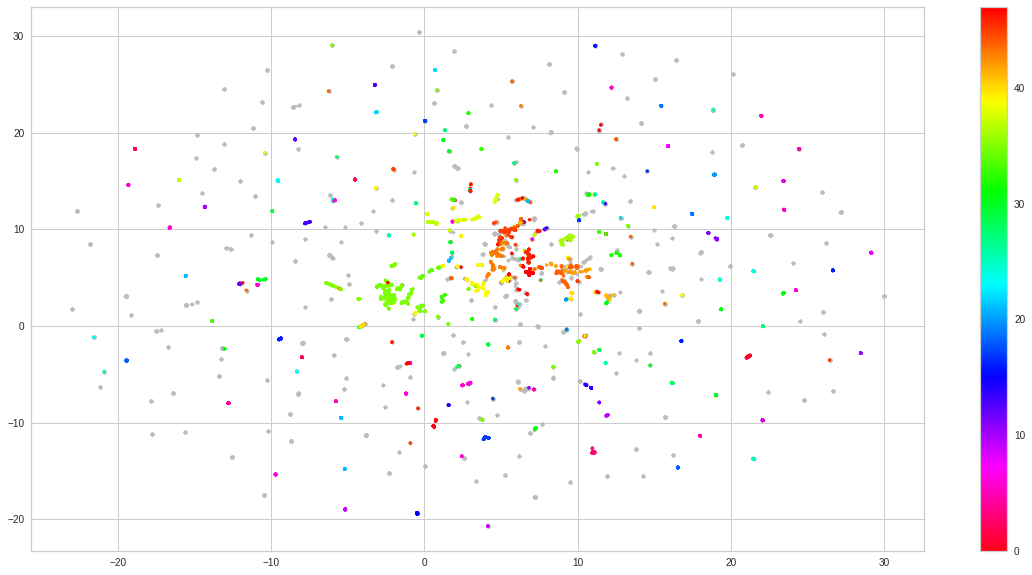

In [56]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=50,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)
umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=10)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10, cmap='hsv_r')
plt.colorbar()

Here we can see the data is sparse, as observed from the high entropy index.

/usr/local/lib/python3.6/dist-packages/joblib/parallel.py:325: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/joblib/parallel.py:325: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/joblib/parallel.py:325: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/joblib/parallel.py:325: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or

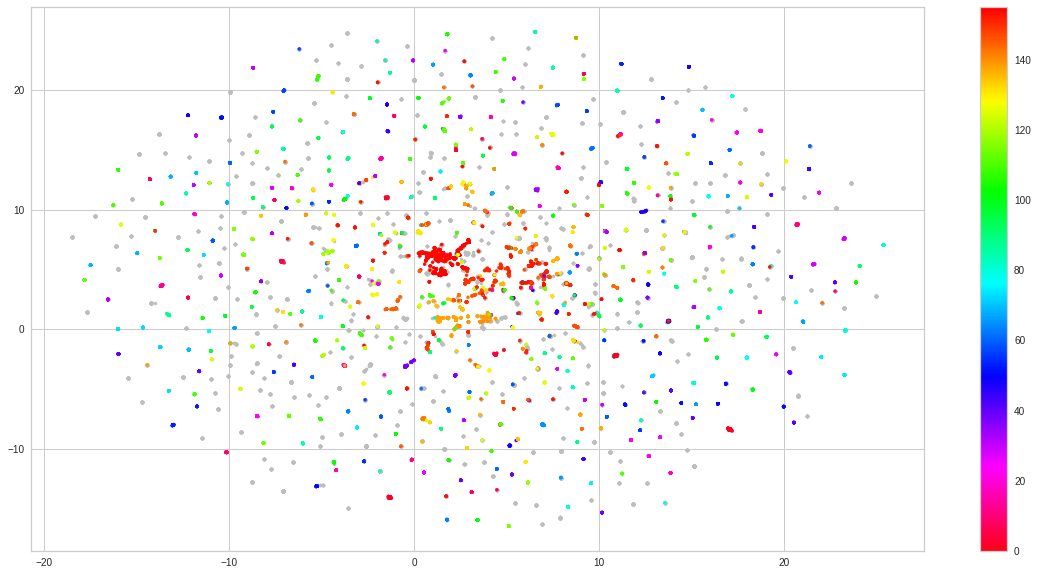

In [57]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(lemm_speech_president_2, show_progress_bar=True)
umap_embeddings = umap.UMAP(n_neighbors=10, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)
cluster = hdbscan.HDBSCAN(min_cluster_size=50,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)
umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=10)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10, cmap='hsv_r')
plt.colorbar()

# Sentiment Analysis

We used the TextBlob to find the sentiment and Subjectivity for our documents.

In [58]:
from textblob import TextBlob
def get_sentiment(data):
    sentiment = []
    subjectivity = []
    for i in data:
        testimonial = TextBlob(i)
        sentiment.append(testimonial.sentiment.polarity)
        subjectivity.append(testimonial.sentiment.subjectivity)
    return sentiment,subjectivity

presidents = [donald_text,obama_text,georgewbush_text,bill_text,georgehbush_text,ronald_text]
def get_results(data):
    overall_sentiment = []
    overall_subjectivity = []
    for i in data:
        sentiment, subjectivity = get_sentiment(i)
        overall_sentiment += sentiment
        overall_subjectivity += subjectivity
    years = [i for i in range(1981,2021)]
    years = sorted(years,reverse=True)
    df = pd.DataFrame({'Sentiment':overall_sentiment,'Subjectivity':overall_subjectivity},index=years)
    return df
    
df = get_results(presidents)
df.head(5)

,Sentiment,Subjectivity
2020,0.155651,0.453330
2019,0.112809,0.443888
2018,0.113246,0.474714
2017,0.153775,0.401551
2016,0.118476,0.431306


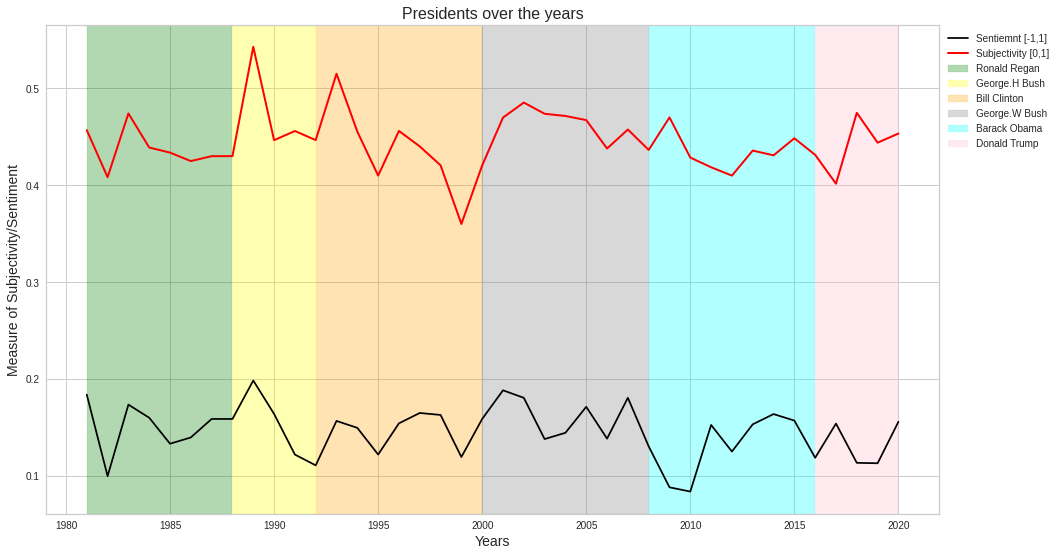

In [59]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df.index,df['Sentiment'],color='black',label='Sentiemnt [-1,1]')
ax.plot(df.index,df['Subjectivity'],color='red',linewidth=2,label='Subjectivity [0,1]')
ax.axvspan(1981, 1988, label="Ronald Regan",color="green", alpha=0.3)
ax.axvspan(1988, 1992, label="George.H Bush",color="yellow", alpha=0.3)
ax.axvspan(1992, 2000, label="Bill Clinton",color="orange", alpha=0.3)
ax.axvspan(2000, 2008, label="George.W Bush",color="grey", alpha=0.3)
ax.axvspan(2008, 2016, label="Barack Obama",color="cyan", alpha=0.3)
ax.axvspan(2016, 2020, label="Donald Trump",color="pink", alpha=0.3)
_=fig=plt.title('Presidents over the years',fontsize=16)
_=fig=plt.xlabel('Years',fontsize=14)
_=fig=plt.ylabel('Measure of Subjectivity/Sentiment',fontsize=14)
# ax.set_xticks([1981,1986,1991,1996,2001,2006,2011,2016,2020])
_=plt.legend(bbox_to_anchor=(1,1),loc='upper left')
_=plt.show()

The sentiment score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.